In [10]:
import pickle
import os

### Below creates dataFrame for selected videos with position and video name

In [11]:
import numpy as np
import os

useVids=[1,3,5,7,13,24,43,46,48,71,77,81,83,89,93,242,681,1060]
np.shape(useVids)

(18,)

In [12]:
cda = os.getcwd()
file_path= cda + "\data\\golfDB.pkl"
data = pickle.load(open(file_path,"rb"))

In [55]:
useVids[1:-2]

[1, 3, 5, 7, 13, 24, 43, 46, 48, 71, 77, 81, 83, 89, 93, 242, 681]

In [13]:
import pandas as pd
aa=[]
i=0
for ii in useVids:
    if i==0:
        aa=data[ii==data.id]
        
    else:
        aa=aa.append(data[ii==data.id])
       
    i=i+1
aa.reset_index(drop=True,inplace=True)
aa.head()

,id,youtube_id,player,sex,club,view,slow,events,bbox,split
0,1,f1BWA5F87Jc,SANDRA GAL,f,driver,down-the-line,1,"[814, 854, 917, 931, 988, 1006, 1019, 1030, 1083, 1137]","[0.039062500000000014, 0.0006944444444444445, 0.6125, 0.9784722222222222]",3
1,3,tA1iotgtMyc,CHRIS DIMARCO,m,driver,down-the-line,1,"[1106, 1190, 1244, 1264, 1300, 1313, 1324, 1335, 1389, 1449]","[0.18515625, 0.0006944444444444445, 0.465625, 0.9715277777777778]",3
2,5,wDCKLePrwHA,BROOKE HENDERSON,f,driver,down-the-line,1,"[510, 528, 579, 598, 634, 650, 665, 674, 723, 763]","[0.1109375, 0.0006944444444444445, 0.50703125, 0.9715277777777778]",3
3,7,iPuVhnI8pJU,NICK WATNEY,m,driver,down-the-line,1,"[751, 794, 843, 859, 896, 918, 929, 938, 996, 1029]","[0.16953125, 0.0006944444444444445, 0.4125, 1.0]",2
4,13,ja5jdy8_TKw,KYLE STANLEY,m,driver,other,1,"[424, 501, 555, 570, 609, 624, 636, 645, 702, 743]","[0.03828125000000001, 0.0006944444444444445, 0.615625, 1.0]",2


In [9]:
aa.iloc[1,7]-1106

array([  0,  84, 138, 158, 194, 207, 218, 229, 283, 343])

In [72]:
aa.to_csv('GolfVidsToUSe.csv')

#### Create folders with images

In [5]:
from doGolfPreProc import createImages as cII
import cv2
fila = cda + '\\data\\videos_160\\'
for ii,aai in enumerate(aa.id):
    fold = fila + str(aai)+'.mp4'
    print(fold)
    pos=aa.iloc[ii,7]
    pos=pos-pos[0]
    print(pos)
    if ii>1:
        cII(fold,pos)
        cap = cv2.VideoCapture(fold)
#         break

SyntaxError: invalid syntax (doGolfPreProc.py, line 71)

In [58]:
fold
folder=fold.split('\\')[-1].split('.')[0]
'_images'+folder

'_images1060'

### More stuff

In [4]:
from fastai.vision.all import *
from fastbook import *
import fastbook
URLs.PASCAL_2007

'https://s3.amazonaws.com/fast-ai-imagelocal/pascal_2007.tgz'

In [29]:

import tarfile
import os.path

source_dir='videos_160'
output_filename='videos'

# def make_tarfile(output_filename, source_dir):
with tarfile.open(output_filename, "w:gz") as tar:
    tar.add(source_dir, arcname=os.path.basename(source_dir))

In [14]:
import cv2
import numpy as np
cda = os.getcwd()

fila = cda + '/data//videos_160//0.mp4'

cap = cv2.VideoCapture(fila)
# while(cap.isOpened()):
#     ret, frame = cap.read()
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print( length )

138


In [22]:
framea = data.iloc[0,-3]
print('length is : {}'.format(framea[-1]-framea[0]))
for n in framea:
    print('diff is {}'.format(n-framea[0]))

length is : 137
diff is 0
diff is 47
diff is 65
diff is 68
diff is 82
diff is 87
diff is 90
diff is 93
diff is 106
diff is 137


### Now do positions on swings

In [14]:
def imDo(im):
    
    fig=plt.figure(figsize=(20, 15))
    plt.imshow(im)

    def tellme(s):
        print(s)
        plt.title(s, fontsize=16)

    tellme('You will define a triangle, click to begin')

    plt.waitforbuttonpress()

    while True:
        pts = []
        while len(pts) < 5:
            tellme('Select 3 corners with mouse')
            pts = np.asarray(plt.ginput(5, timeout=-1))
            if len(pts) < 5:
                tellme('Too few points, starting over')
                time.sleep(1)  # Wait a second
        
        ph = plt.plot(pts[:, 0], pts[:, 1], marker='x',markersize=20,markeredgewidth=3)

        tellme('Happy? Key click for yes, mouse click for no')

        if plt.waitforbuttonpress():
            break
    plt.close(fig)
    return pts

In [15]:
import fastbook

from fastbook import *
from fastai.vision.all import *
import matplotlib

cda = os.getcwd()

matplotlib.use('TKAgg')

In [19]:
np.shape(lsa)

(18,)

In [21]:
foldOuta=cda+'//_dataSel//'
lsa = os.listdir(foldOuta)
lsa
ptsALL=[]
for ii,folds in enumerate(lsa):
    if ii>16:
        print(folds)
        img_files = get_image_files(foldOuta+folds)
        for fils in img_files:
            im = PILImage.create(fils)
            pts=imDo(im)
            ptsALL.append(pts)
            fnom=str(fils).split('\\')[-1].split('.')[0]
    #         with open(foldOuta+folds+'\\'+fnom+'.txt','w') as f:
    #             f.write(str(pts))
            np.savetxt(foldOuta+folds+'\\'+fnom+'.txt',pts)

_images93
You will define a triangle, click to begin
Select 3 corners with mouse
Happy? Key click for yes, mouse click for no
You will define a triangle, click to begin
Select 3 corners with mouse
Happy? Key click for yes, mouse click for no
You will define a triangle, click to begin
Select 3 corners with mouse
Happy? Key click for yes, mouse click for no
You will define a triangle, click to begin
Select 3 corners with mouse
Happy? Key click for yes, mouse click for no
You will define a triangle, click to begin
Select 3 corners with mouse
Happy? Key click for yes, mouse click for no
You will define a triangle, click to begin
Select 3 corners with mouse
Happy? Key click for yes, mouse click for no
You will define a triangle, click to begin
Select 3 corners with mouse
Happy? Key click for yes, mouse click for no


_images1
0 0
1 0
0 1
1 1
0 2
1 2


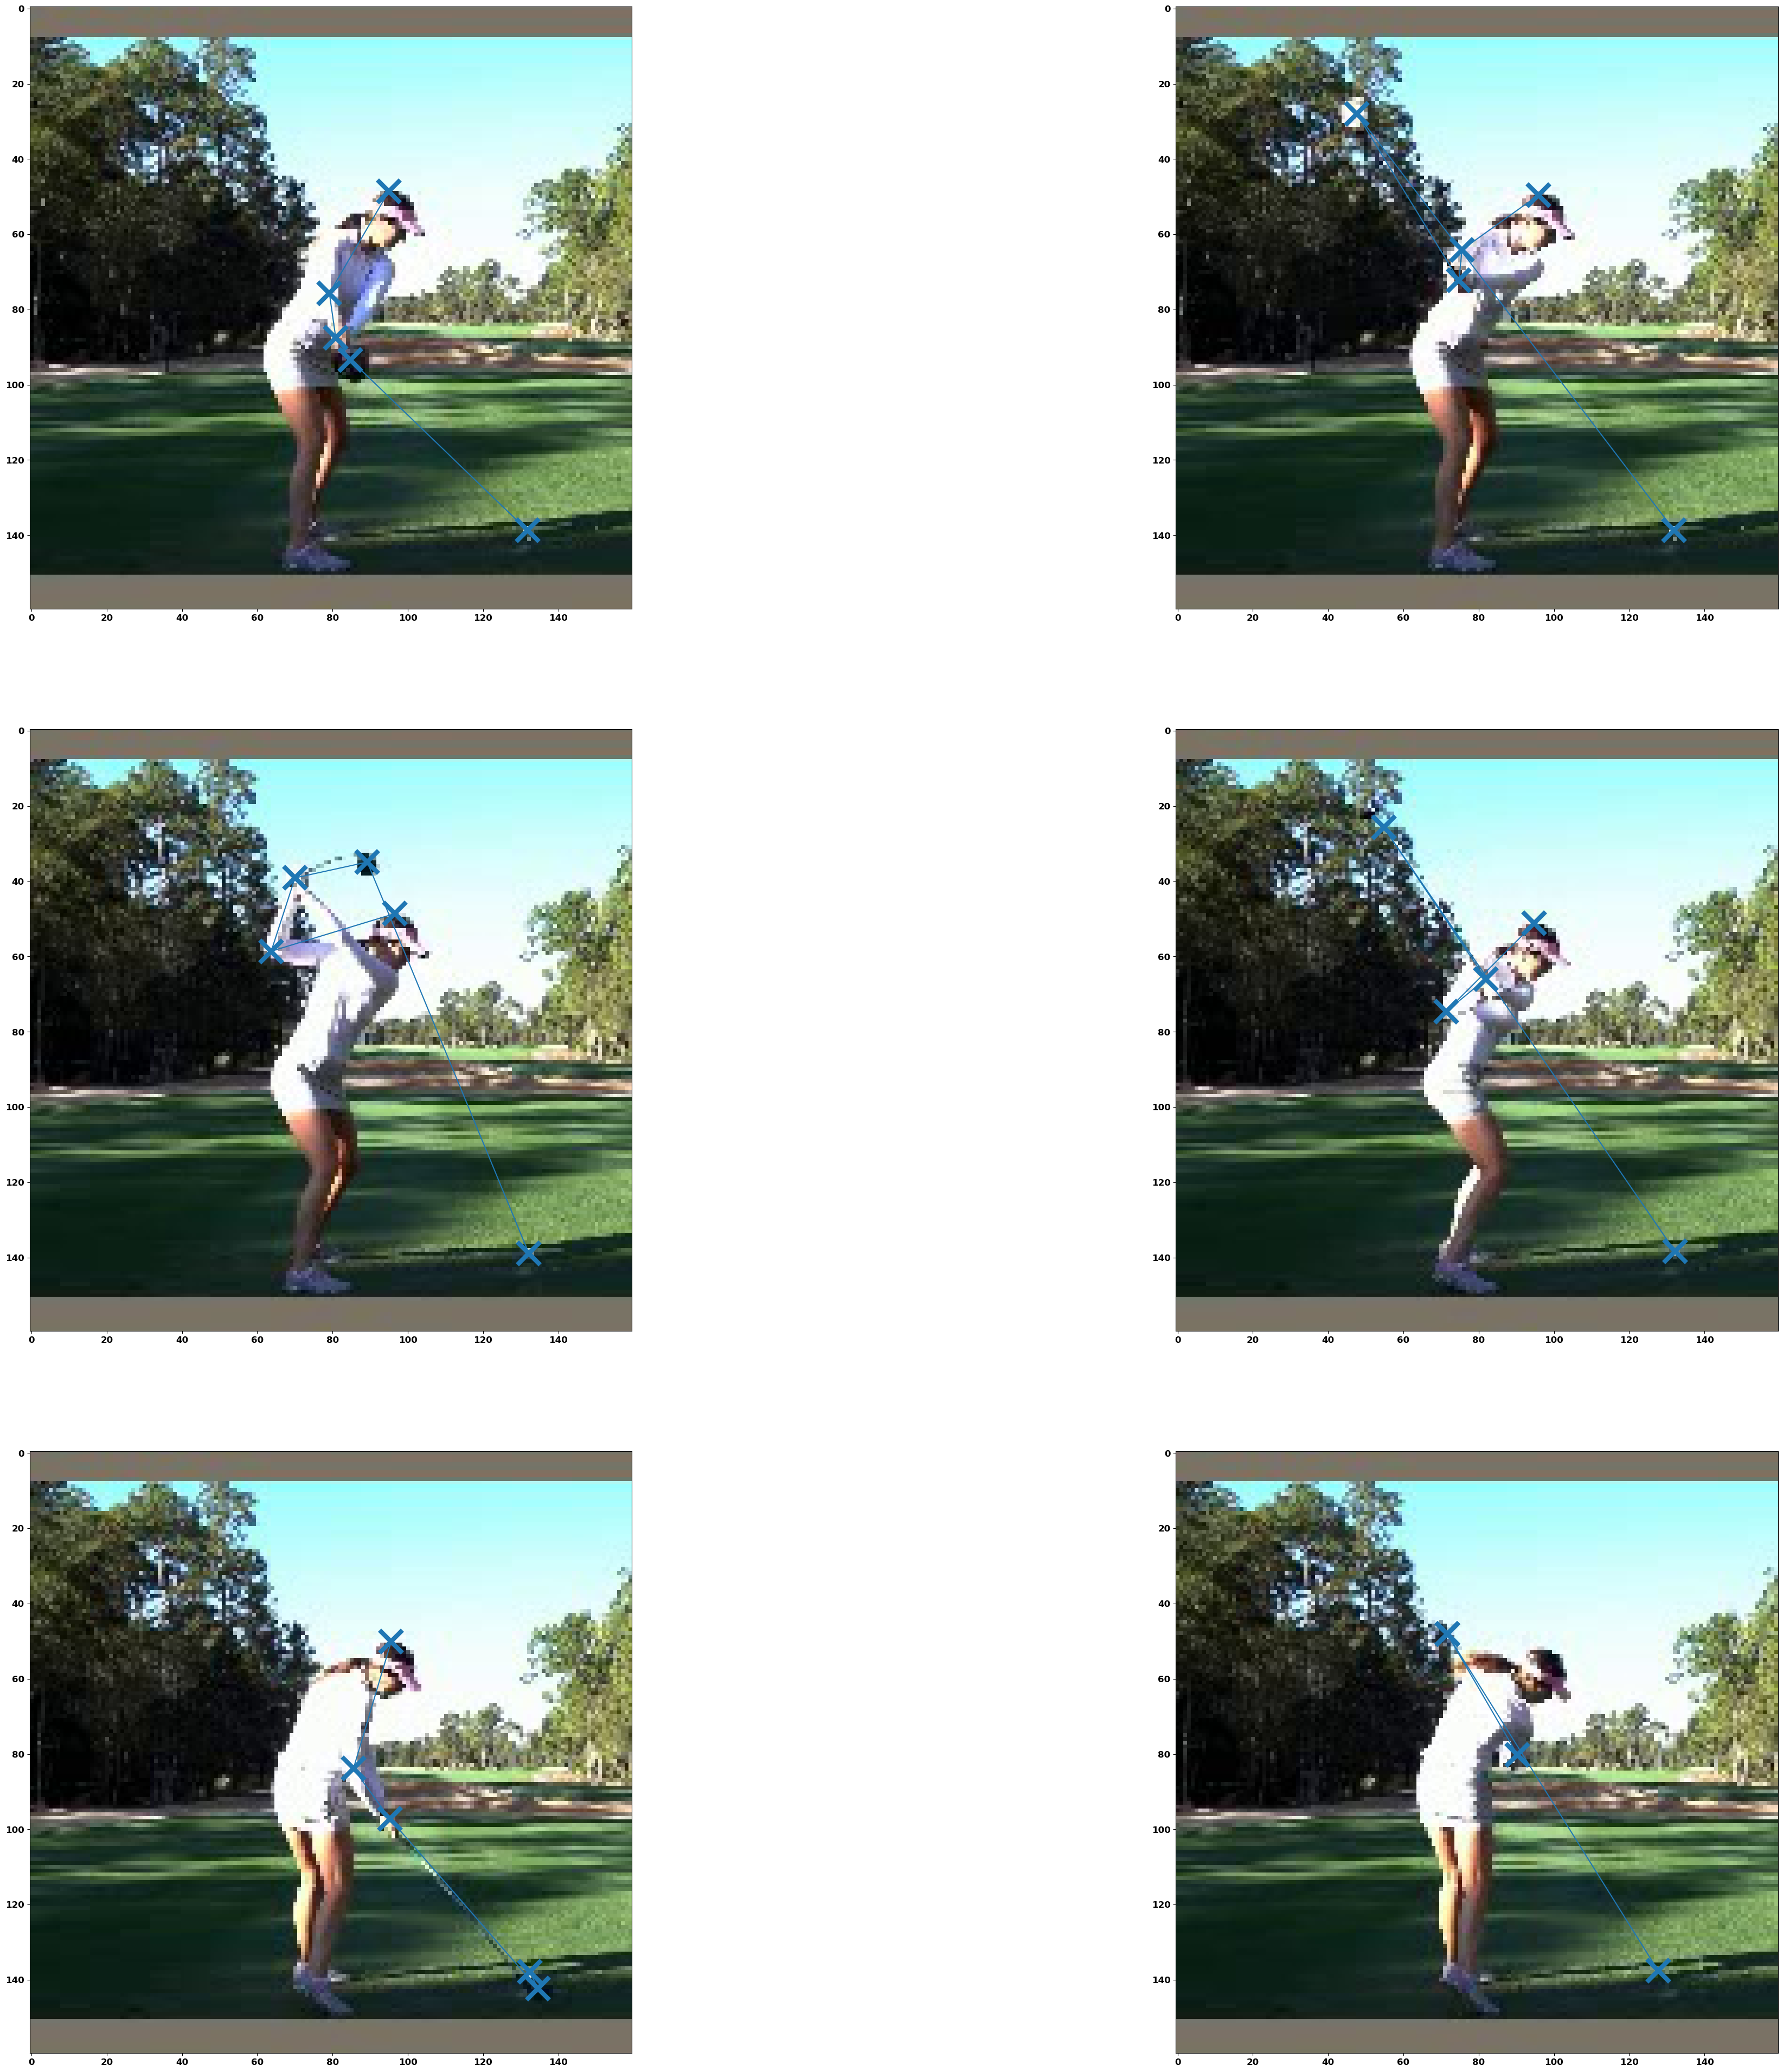

In [10]:
[0,0]

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)